In [7]:
# 导入所需的Python库
from selenium import webdriver  # 用于自动化控制浏览器
import re  # 用于正则表达式匹配
import time  # 用于添加延时

# 初始化Selenium WebDriver
driver = webdriver.Chrome()  # 创建Chrome浏览器实例
driver.get('https://www.maigoo.com/news/486551.html')  # 访问目标网页

# 等待3秒钟让页面完全加载
time.sleep(3)

# 等待用户手动操作
input("请手动点击加载更多按钮，完成后按回车继续...")  # 提示用户进行手动操作

# 获取网页源代码
html = driver.page_source  # 获取当前页面的完整HTML内容

# 使用正则表达式提取各类地区的GDP数据
# 匹配省份数据（以"省"结尾的地区）
matches_province = re.findall(r'<tr class="md_tr font14 bgcolor.*?">\s*<td class="md_td">(.*?省)</td>\s*<td class="md_td">(.*?)</td>', html)
# 匹配自治区数据（以"自治区"结尾的地区）
matches_autonomous = re.findall(r'<tr class="md_tr font14 bgcolor.*?">\s*<td class="md_td">(.*?自治区)</td>\s*<td class="md_td">(.*?)</td>', html)
# 匹配直辖市数据（以"市"结尾的地区）
matches_municipality = re.findall(r'<tr class="md_tr font14 bgcolor.*?">\s*<td class="md_td">(.*?市)</td>\s*<td class="md_td">(.*?)</td>', html)

# 创建空列表存储所有地区的GDP数据
gdp_data = []

# 处理所有匹配到的数据
for matches in [matches_province, matches_autonomous, matches_municipality]:  # 遍历三种类型的地区数据
    for region, gdp in matches:  # 解包每个匹配结果中的地区名和GDP值
        gdp_data.append({
            '地区': region,  # 存储地区名
            'GDP': float(gdp)  # 将GDP值转换为浮点数
        })

# 输出结果
print('学号：222226205227')  # 打印学号
for data in gdp_data:  # 遍历并打印每个地区的GDP数据
    print(f"{data['地区']}: {data['GDP']} 亿元")

driver.quit()  # 关闭浏览器，释放资源

学号：222226205227
广东省: 135673.16 亿元
江苏省: 128222.2 亿元
山东省: 92068.7 亿元
浙江省: 82553.0 亿元
四川省: 60132.9 亿元
河南省: 59132.39 亿元
湖北省: 55803.63 亿元
福建省: 54355.1 亿元
湖南省: 50012.85 亿元
安徽省: 47050.6 亿元
河北省: 43944.1 亿元
陕西省: 33786.07 亿元
江西省: 32200.1 亿元
辽宁省: 30209.4 亿元
云南省: 30021.0 亿元
山西省: 25698.2 亿元
贵州省: 20913.25 亿元
黑龙江省: 15883.9 亿元
吉林省: 13531.19 亿元
甘肃省: 11863.8 亿元
海南省: 7551.18 亿元
青海省: 3799.1 亿元
广西壮族自治区: 27202.39 亿元
内蒙古自治区: 24627.0 亿元
新疆维吾尔自治区: 19125.91 亿元
宁夏回族自治区: 5314.95 亿元
西藏自治区: 2392.67 亿元
上海市: 47218.66 亿元
北京市: 43760.7 亿元
重庆市: 30145.79 亿元
天津市: 16737.3 亿元


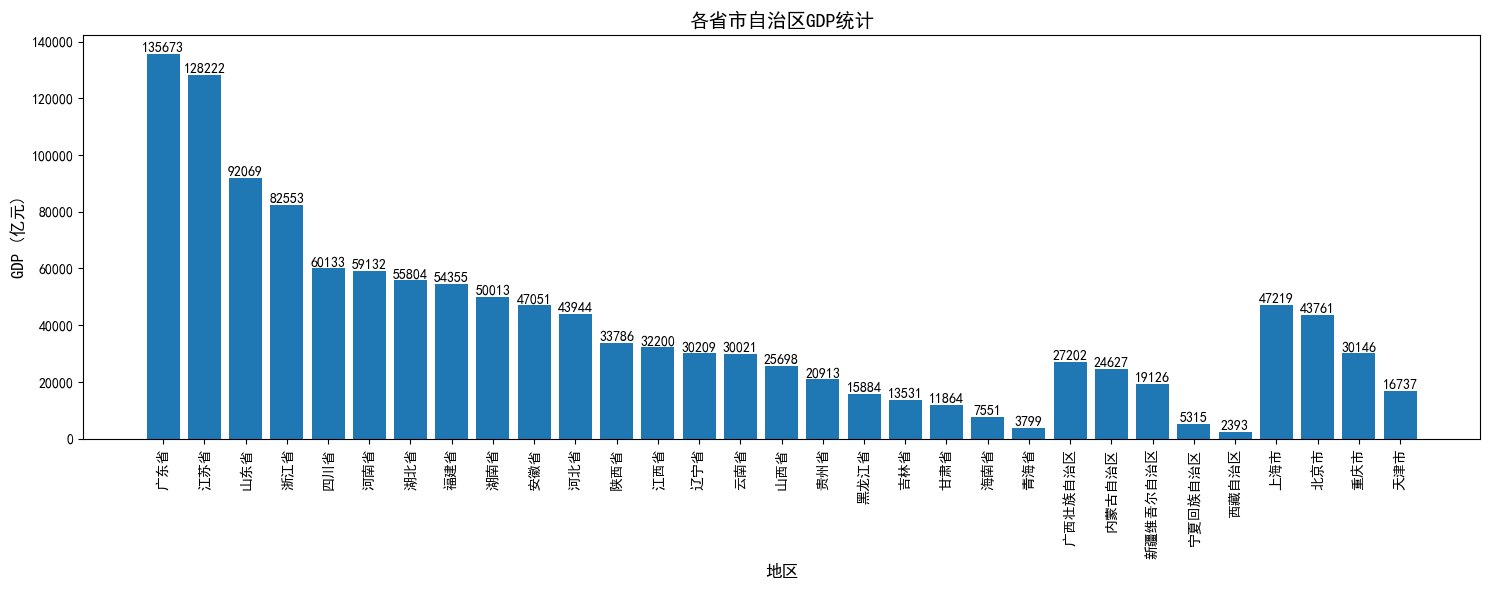

In [6]:
# 导入matplotlib库，用于数据可视化
import matplotlib.pyplot as plt  # plt用于绘图
import matplotlib  # matplotlib基础库

# 设置中文字体，解决中文显示问题
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置黑体作为默认中文字体，确保中文能正确显示
matplotlib.rcParams['axes.unicode_minus'] = False    # 正确显示负号，避免显示为方块

# 从gdp_data中提取数据，使用列表推导式分别获取地区名称和GDP值
regions = [data['地区'] for data in gdp_data]  # 提取所有地区名称保存到列表
gdp_values = [data['GDP'] for data in gdp_data]  # 提取所有GDP值保存到列表

# 创建图形对象，设置画布大小
plt.figure(figsize=(15, 6))  # 设置图形大小为宽15英寸，高6英寸，确保图形清晰可见

# 创建柱状图，regions作为x轴数据，gdp_values作为y轴数据
plt.bar(regions, gdp_values)  # 使用plt.bar()函数创建柱状图，每个地区对应一个柱形

# 设置图表标题和坐标轴标签
plt.title('各省市自治区GDP统计', fontsize=14)  # 设置图表标题，字体大小为14
plt.xlabel('地区', fontsize=12)  # 设置x轴标签，字体大小为12
plt.ylabel('GDP (亿元)', fontsize=12)  # 设置y轴标签，字体大小为12

# 旋转x轴标签文字，避免文字重叠
plt.xticks(rotation=90)  # 将x轴标签文字旋转90度，使其垂直显示

# 在每个柱形上方添加数值标签
for i, v in enumerate(gdp_values):  # 遍历GDP值列表，i为索引，v为值
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')  # 在柱形顶部添加GDP数值，保留整数

# 自动调整图表布局，确保所有元素都能完整显示
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域

# 显示绘制的图表
plt.show()  # 在输出中显示生成的图表